# Taxi Fare Predictor

In [33]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Importing Data

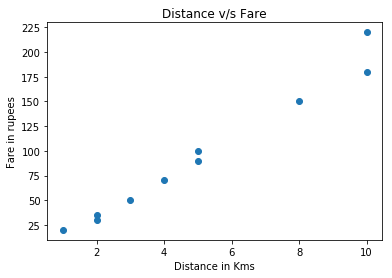

In [34]:
points=np.genfromtxt('Fare.csv',delimiter=',')

#Extracting Columns
x=np.array(points[:,0])
y=np.array(points[:,1])

#Plotting dataset
plt.scatter(x,y)
plt.xlabel('Distance in Kms')
plt.ylabel('Fare in rupees')
plt.title('Distance v/s Fare')
plt.show()

In [35]:
#Hyperparameters

learningRate=0.01
initial_b=0
initial_w=0
numIterations=10

Cost function

In [36]:
def computeCost(b,w,points):
    totalCost=0
    N=float(len(points))
    for i in range(0,len(points)):
        x=points[i,0]
        y=points[i,1]
        totalCost=totalCost+(y-(w*x+b))**2
    return totalCost/N

Gradiant descent function

In [37]:
def gradient_descent(points,starting_b,starting_w,learningRate,numIterations):
    b=starting_b
    w=starting_w
    cost_graph=[]
    for i in range(numIterations):
        cost_graph.append(computeCost(b,w,points))
        b,w=step_gradient(b,w,np.array(points),learningRate)
    return [b,w,cost_graph]

def step_gradient(current_b,current_w,points,learningRate):
    gradient_w=0
    gradient_b=0
    N=float(len(points))
    for i in range(0,len(points)):
        x=points[i,0]
        y=points[i,1]
        gradient_w=gradient_w+(-(2/N)*x*(y-(current_w*x+current_b)))
        gradient_b=gradient_b+(-(2/N)*(y-(current_w*x+current_b)))
        
    updated_w=current_w-learningRate*gradient_w
    updated_b=current_b-learningRate*gradient_b
    
    return updated_b,updated_w    

In [38]:
b,w,cost_graph=gradient_descent(points,initial_b,initial_w,learningRate,numIterations)

print('Optimized b:',b)
print('Optimized w',w)

print('Minimized cost:',computeCost(b,w,points))

Optimized b: 2.1747949418805845
Optimized w 19.015082806215215
Minimized cost: 128.18451054940078


Plotting cost per iterations

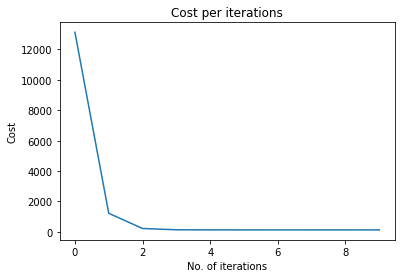

In [39]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iterations')
plt.show()

Plotting line of best fit

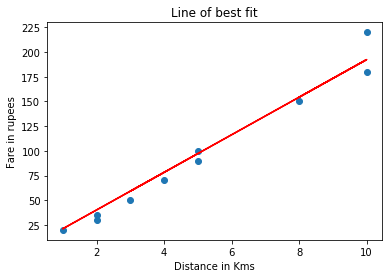

In [40]:
plt.scatter(x,y)
pred=w*x+b
plt.plot(x,pred,c='r')
plt.xlabel('Distance in Kms')
plt.ylabel('Fare in rupees')
plt.title('Line of best fit')
plt.show()